# Store US Stock Prices in HDF5 Format

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
idx = pd.IndexSlice

## Load source data

In [3]:
df = pd.read_csv('../data/us_stocks.csv', 
                 parse_dates=['date'], 
                 index_col=['ticker', 'date'])

In [4]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, ('A', Timestamp('1999-11-18 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   open         15388776 non-null  float64
 1   high         15389259 non-null  float64
 2   low          15389259 non-null  float64
 3   close        15389313 non-null  float64
 4   volume       15389314 non-null  float64
 5   ex-dividend  15389314 non-null  float64
 6   split_ratio  15389313 non-null  float64
 7   adj_open     15388776 non-null  float64
 8   adj_high     15389259 non-null  float64
 9   adj_low      15389259 non-null  float64
 10  adj_close    15389313 non-null  float64
 11  adj_volume   15389314 non-null  float64
dtypes: float64(12)
memory usage: 1.4+ GB


In [5]:
df.head()

open   high    low  close      volume  ex-dividend  \
ticker date                                                              
A      1999-11-18  45.50  50.00  40.00  44.00  44739900.0          0.0   
       1999-11-19  42.94  43.00  39.81  40.38  10897100.0          0.0   
       1999-11-22  41.31  44.00  40.06  44.00   4705200.0          0.0   
       1999-11-23  42.50  43.63  40.25  40.25   4274400.0          0.0   
       1999-11-24  40.13  41.94  40.00  41.06   3464400.0          0.0   

                   split_ratio   adj_open   adj_high    adj_low  adj_close  \
ticker date                                                                  
A      1999-11-18          1.0  31.041951  34.112034  27.289627  30.018590   
       1999-11-19          1.0  29.295415  29.336350  27.160002  27.548879   
       1999-11-22          1.0  28.183363  30.018590  27.330562  30.018590   
       1999-11-23          1.0  28.995229  29.766161  27.460188  27.460188   
       1999-11-24          1.0  27.378319  28.613174  27.289627  28.012803   

                   adj_volume  
ticker date                    
A      1999-11-18  44739900.0  
       1999-11-19  10897100.0  
       1999-11-22   4705200.0  
       1999-11-23   4274400.0  
       1999-11-24   3464400.0

In [6]:
df = (df.loc[idx[:, '2000':], :]
      .filter(like='adj')
      .rename(columns=lambda x: x.replace('adj_', ''))
      .dropna())

In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11343366 entries, ('A', Timestamp('2000-01-03 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count     Dtype  
---  ------  --------------     -----  
 0   open    11343366 non-null  float64
 1   high    11343366 non-null  float64
 2   low     11343366 non-null  float64
 3   close   11343366 non-null  float64
 4   volume  11343366 non-null  float64
dtypes: float64(5)
memory usage: 476.7+ MB


In [8]:
symbol = 'AAPL'

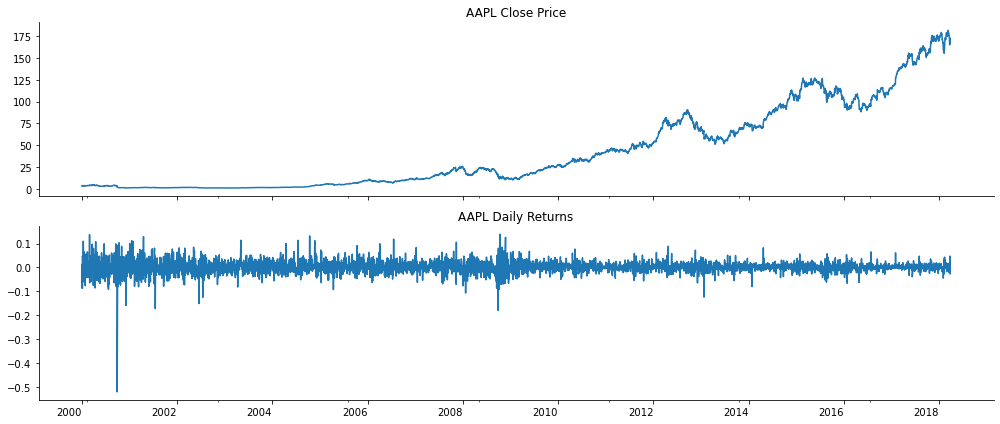

In [9]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 6), sharex=True)
s = df.loc[symbol, 'close']
s.plot(rot=0, ax=axes[0], title=f'{symbol} Close Price')
s.pct_change().plot(rot=0, ax=axes[1], title=f'{symbol} Daily Returns')
axes[1].set_xlabel('')
sns.despine()
fig.tight_layout()

## Store in HDF5 format

In [10]:
df.to_hdf('../data/stock_prices.h5', 'us_stocks')